<a href="https://colab.research.google.com/github/MonitSharma/Quantum-Finance-and-Numerical-Methods/blob/main/Phase_Kickback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase Kickback




## Exploring the CNOT-Gate

We known that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$


$$ \text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$


But what will happen if the seconf qubit is also in superposition?

In [ ]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex


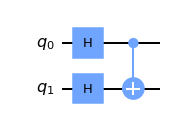

In [ ]:
# make the circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw('mpl')

In the above circuit we have the CNOT acting on the state:

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Since the CNOT swaps the amplitudes of $|01⟩$ and $|11⟩$ , we see no change:

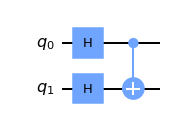

In [ ]:
display(qc.draw('mpl'))

<IPython.core.display.Latex object>

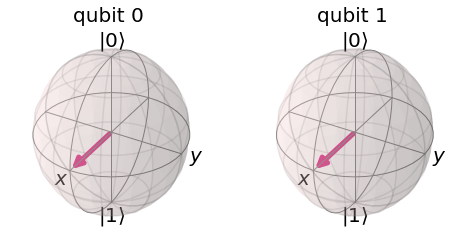

In [ ]:
# lets see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)


Let's put one state in the $|-⟩$ so it has a negative phase

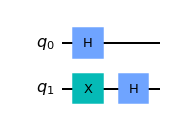

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')


This create a state:

$$|{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)$$

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

<IPython.core.display.Latex object>

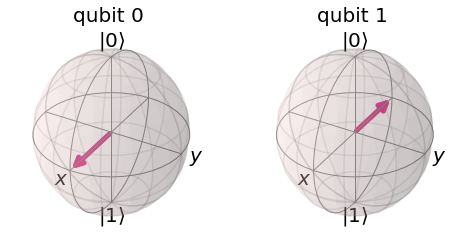

In [ ]:
display(qc.draw())
# See the result
qc1 = qc.copy()
qc1.save_statevector()
final_state = svsim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

If the $CNOT$ acts on this state, we will swap the amplitude of $|01⟩$ and $|11⟩$ resulting in:

$$ \begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned} $$


This is interesting because it affects the state of the `control` qubit while leaving the `target` qubit unchanged.

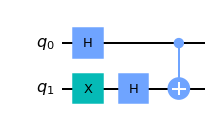

<IPython.core.display.Latex object>

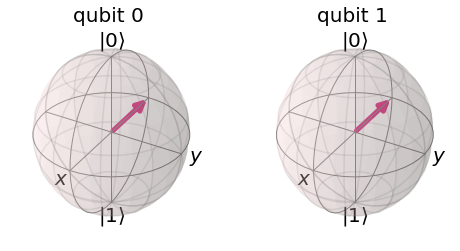

In [ ]:
qc.cx(0,1)
display(qc.draw('mpl'))

qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)


If you remeber the $H-$ gate transforms $|+⟩ → |0⟩$ and $|-⟩ → |1⟩$, we can see that wrapping a $CNOT$ in $H-$gates has the equivalent behavior of a $CNOT$ used in opposite direction:
![](https://qiskit.org/textbook/ch-gates/images/identities_1.svg)



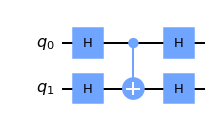

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw('mpl')) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

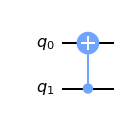

<IPython.core.display.Latex object>

In [ ]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))
qc.save_unitary()

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

**This identity is called Phase Kickback**

## Phase Kickback

### Explaining the CNOT identity


This is an example of *kickback* which is very important and is used in almost every quantum algorithm. Kickback is where the eigenvalue added by a gate to a qubit is **kicked back** into a different qubit via a controlled operatrion.


For example:
We saw that performing an $X-$gate on a $|-⟩$ qubit gives it the phase $-1$

$$ X|{-}\rangle = -|{-}\rangle$$

When our control qubit is in either $|0⟩$ or $|1⟩$, this phase affects the whole state, however it is a global phase and has no observable effects:

$$ \begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned}$$




------------------------------

The interesting effect is when our control qubit is in superposition. The componenbt of the control qubit that lies in the direction of $|1⟩$ applies this phase factor to the corresposnding target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:

$$ \begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned}$$


This can be written as the two separable qubit states:

$$ \begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned} $$



Wrapping the CNOT in H0gate transforms the qubits from the computational basis to the $|+⟩, |-⟩$ basis, where we see this effect,

This identity is very useful in hardware, since some hardwares only allow for CNOTs in one direction between two specific qubits.

## Kickback with the T-gate

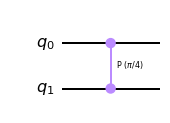

In [ ]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw('mpl')

The $T$-gate has the matrix:

$$ \text{T} = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix} $$
 

and the controlled $T$-gate has the matrix:

$$ \text{Controlled-T} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix} $$



In [ ]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

More generally we can find the matrix of any controlled -U operation using the rule:

\begin{aligned}
\text{U} & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-U} & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned}



Using the qiskit's qubit ordering
\text{Controlled-U} =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix}


If we apply the T gate to the qubit in the state $|1⟩$ we add a phase of $e^{\iota \pi/4}$ to this qubit:

$$ T|1\rangle = e^{i\pi/4}|1\rangle $$

This is global phase and is unobservable. But if we could control this operation using another qubit in the  $|+⟩$
  state, the phase is no longer global but relative, which changes the relative phase in our control qubit:

  \begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-T}|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned}


This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. Let's see this in Qiskit:



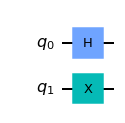

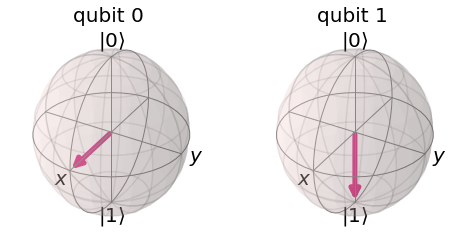

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

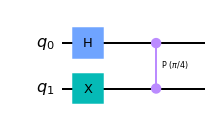

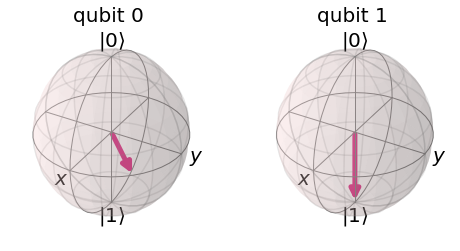

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw('mpl'))
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

We can see the leftmost qubit has been rotated by  $π/4$
  around the Z-axis of the Bloch sphere as expected. After exploring this behaviour, it may become clear why Qiskit draws the controlled-Z rotation gates in this symmetrical fashion (two controls instead of a control and a target). There is no clear control or target qubit for all cases.